# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve

# Load Results Data

Model naming key:

`t` prefix indicates that claim model was fine-tuned on the transfer learning model weights

`m` prefix indicates that claim model was NOT fine-tuned on transfer learning model weights

`1` indicates unbalanced training data

`2` indicates undersampling balanced training data

`3` indicates oversampling balanced training data

In [2]:
# Unbalanced training data, no transfer learning
val_m1 = pd.read_csv('no_transfer_unbalanced_val_results.csv')
test_m1 = pd.read_csv('no_transfer_unbalanced_test_results.csv')
# Add bert_pred column to test with index of max value in predictions column
test_m1[['pred_0', 'pred_1']] = test_m1['predictions'].str.extract(r'^[\s\[\]]*([-\d\.]+)[\s\[\]]*([-\d\.]+)[ ,\[\]]*$')
test_m1['bert_pred'] = np.argmax(test_m1[['pred_0', 'pred_1']].values, axis=1)
test_m1.drop(columns=['pred_0', 'pred_1'], inplace=True)
# Rename y_pred, bert_pred columns
val_m1 = val_m1.rename(columns={'y_pred': 'crf_pred_m1', 'bert_pred': 'bert_pred_m1'})
test_m1 = test_m1.rename(columns={'y_pred': 'crf_pred_m1', 'bert_pred': 'bert_pred_m1'})

# Unbalanced training data, transfer learning
val_t1 = pd.read_csv('transfer_unbalanced_val_results.csv')
test_t1 = pd.read_csv('transfer_unbalanced_test_results.csv')
# Add bert_pred column to test with index of max value in predictions column
test_t1[['pred_0', 'pred_1']] = test_t1['predictions'].str.extract(r'^[\s\[\]]*([-\d\.]+)[\s\[\]]*([-\d\.]+)[ ,\[\]]*$')
test_t1['bert_pred'] = np.argmax(test_t1[['pred_0', 'pred_1']].values, axis=1)
test_t1.drop(columns=['pred_0', 'pred_1'], inplace=True)
# Rename y_pred, bert_pred columns
val_t1 = val_t1.rename(columns={'y_pred': 'crf_pred_t1', 'bert_pred': 'bert_pred_t1'})
test_t1 = test_t1.rename(columns={'y_pred': 'crf_pred_t1', 'bert_pred': 'bert_pred_t1'})

# Under-sampled training data, no transfer learning
val_m2 = pd.read_csv('no_transfer_undersampled_val_results.csv')
test_m2 = pd.read_csv('no_transfer_undersampled_test_results.csv')
# Add bert_pred column to test with index of max value in predictions column
test_m2[['pred_0', 'pred_1']] = test_m2['predictions'].str.extract(r'^[\s\[\]]*([-\d\.]+)[\s\[\]]*([-\d\.]+)[ ,\[\]]*$')
test_m2['bert_pred'] = np.argmax(test_m2[['pred_0', 'pred_1']].values, axis=1)
test_m2.drop(columns=['pred_0', 'pred_1'], inplace=True)
# Rename y_pred, bert_pred columns
val_m2 = val_m2.rename(columns={'y_pred': 'crf_pred_m2', 'bert_pred': 'bert_pred_m2'})
test_m2 = test_m2.rename(columns={'y_pred': 'crf_pred_m2', 'bert_pred': 'bert_pred_m2'})

# Under-sampled training data, transfer learning
val_t2 = pd.read_csv('transfer_undersampled_val_results.csv')
test_t2 = pd.read_csv('transfer_undersampled_test_results.csv')
# Add bert_pred column to test with index of max value in predictions column
test_t2[['pred_0', 'pred_1']] = test_t2['predictions'].str.extract(r'^[\s\[\]]*([-\d\.]+)[\s\[\]]*([-\d\.]+)[ ,\[\]]*$')
test_t2['bert_pred'] = np.argmax(test_t2[['pred_0', 'pred_1']].values, axis=1)
test_t2.drop(columns=['pred_0', 'pred_1'], inplace=True)
# Rename y_pred, bert_pred columns
val_t2 = val_t2.rename(columns={'y_pred': 'crf_pred_t2', 'bert_pred': 'bert_pred_t2'})
test_t2 = test_t2.rename(columns={'y_pred': 'crf_pred_t2', 'bert_pred': 'bert_pred_t2'})

# Over-sampled training data, no transfer learning
val_m3 = pd.read_csv('no_transfer_oversampled_val_results.csv')
test_m3 = pd.read_csv('no_transfer_oversampled_test_results.csv')
# Add bert_pred column to test with index of max value in predictions column
test_m3[['pred_0', 'pred_1']] = test_m3['predictions'].str.extract(r'^[\s\[\]]*([-\d\.]+)[\s\[\]]*([-\d\.]+)[ ,\[\]]*$')
test_m3['bert_pred'] = np.argmax(test_m3[['pred_0', 'pred_1']].values, axis=1)
test_m3.drop(columns=['pred_0', 'pred_1'], inplace=True)
# Rename y_pred, bert_pred columns
val_m3 = val_m3.rename(columns={'y_pred': 'crf_pred_m3', 'bert_pred': 'bert_pred_m3'})
test_m3 = test_m3.rename(columns={'y_pred': 'crf_pred_m3', 'bert_pred': 'bert_pred_m3'})

# Over-sampled training data, transfer learning
val_t3 = pd.read_csv('transfer_oversampled_val_results.csv')
test_t3 = pd.read_csv('transfer_oversampled_test_results.csv')
# Add bert_pred column to test with index of max value in predictions column
test_t3[['pred_0', 'pred_1']] = test_t3['predictions'].str.extract(r'^[\s\[\]]*([-\d\.]+)[\s\[\]]*([-\d\.]+)[ ,\[\]]*$')
test_t3['bert_pred'] = np.argmax(test_t3[['pred_0', 'pred_1']].values, axis=1)
test_t3.drop(columns=['pred_0', 'pred_1'], inplace=True)
# Rename y_pred, bert_pred columns
val_t3 = val_t3.rename(columns={'y_pred': 'crf_pred_t3', 'bert_pred': 'bert_pred_t3'})
test_t3 = test_t3.rename(columns={'y_pred': 'crf_pred_t3', 'bert_pred': 'bert_pred_t3'})

In [3]:
# Function to format claim dataset
def explode_df(df):
  '''Convert claim dataset into one row per sentence format'''
  # Add sentence id to indicate order within abstract
  sentence_ids = []
  for label_list in df.labels:
    sentence_ids.append(list(range(len(label_list))))
  df['sentence_ids'] = sentence_ids

  # Explode labels, sentences, and ids
  df2 = df.explode(list(('labels','sentences', 'sentence_ids')),
                   ignore_index=True)
  df2['labels'] = df2['labels'].astype('int')
  df2['sentence_ids'] = df2['sentence_ids'].astype('int')
  return df2

In [28]:
# Load and format original data
train_df = pd.read_json('claim_dataset/train_labels.json', lines=True)
val_df = pd.read_json('claim_dataset/validation_labels.json', lines=True)
test_df = pd.read_json('claim_dataset/test_labels.json', lines=True)

train_df = explode_df(train_df)
train_df.drop(columns=['abstract', 'journal', 'title'], inplace=True)
val_df = explode_df(val_df)
val_df.drop(columns=['abstract', 'journal', 'title'], inplace=True)
test_df = explode_df(test_df)
test_df.drop(columns=['abstract', 'journal', 'title'], inplace=True)

# Add UID label to each abstract sentence
train_df['uID'] = train_df['paper_id'].astype(str) + '_' + train_df['sentence_ids'].astype(str)
val_df['uID'] = val_df['paper_id'].astype(str) + '_' + val_df['sentence_ids'].astype(str)
test_df['uID'] = test_df['paper_id'].astype(str) + '_' + test_df['sentence_ids'].astype(str)

# Add unique identifier to validation and testing tables
for df in [val_m1, test_m1, val_t1, test_t1, val_m2, test_m2, val_t2, test_t2, val_m3, test_m3, val_t3, test_t3]:
  df['uID'] = df['paper_ids'].astype(str) + '_' + df['sentence_ids'].astype(str)


In [29]:
# Join model m1 results
val_df = val_df.merge(val_m1[['uID', 'max_sentence_id', 'crf_pred_m1',  'bert_pred_m1']], on='uID', how='left')
test_df = test_df.merge(test_m1[['uID', 'max_sentence_id', 'crf_pred_m1',  'bert_pred_m1']], on='uID', how='left')

# Join model t1 results
val_df = val_df.merge(val_t1[['uID', 'crf_pred_t1', 'bert_pred_t1']], on='uID', how='left')
test_df = test_df.merge(test_t1[['uID', 'crf_pred_t1', 'bert_pred_t1']], on='uID', how='left')

# Join model m2 results
val_df = val_df.merge(val_m2[['uID', 'crf_pred_m2', 'bert_pred_m2']], on='uID', how='left')
test_df = test_df.merge(test_m2[['uID', 'crf_pred_m2', 'bert_pred_m2']], on='uID', how='left')

# Join model t2 results
val_df = val_df.merge(val_t2[['uID', 'crf_pred_t2', 'bert_pred_t2']], on='uID', how='left')
test_df = test_df.merge(test_t2[['uID', 'crf_pred_t2', 'bert_pred_t2']], on='uID', how='left')

# Join model m3 results
val_df = val_df.merge(val_m3[['uID', 'crf_pred_m3', 'bert_pred_m3']], on='uID', how='left')
test_df = test_df.merge(test_m3[['uID', 'crf_pred_m3', 'bert_pred_m3']], on='uID', how='left')

# Join model t3 results
val_df = val_df.merge(val_t3[['uID', 'crf_pred_t3', 'bert_pred_t3']], on='uID', how='left')
test_df = test_df.merge(test_t3[['uID', 'crf_pred_t3', 'bert_pred_t3']], on='uID', how='left')

# Add positon encoding - 0 for beginning, 1 for middle, 2 for end
val_df['sentence_position'] = round(val_df['sentence_ids'] / val_df['max_sentence_id'],1)
val_df['sentence_pos_encoding'] = val_df['sentence_position'].apply(lambda x: 0 if x < 0.3 else (1 if x < 0.7 else 2))
test_df['sentence_position'] = round(test_df['sentence_ids'] / test_df['max_sentence_id'],1)
test_df['sentence_pos_encoding'] = test_df['sentence_position'].apply(lambda x: 0 if x < 0.3 else (1 if x < 0.7 else 2))

# Add last sentece based prediction model
val_df['baseline_last_sentence'] = (val_df['max_sentence_id'] == val_df['sentence_ids']).astype(int)
test_df['baseline_last_sentence'] = (test_df['max_sentence_id'] == test_df['sentence_ids']).astype(int)



In [30]:
val_df.head()

,paper_id,labels,sentences,sentence_ids,uID,max_sentence_id,crf_pred_m1,bert_pred_m1,crf_pred_t1,bert_pred_t1,...,bert_pred_m2,crf_pred_t2,bert_pred_t2,crf_pred_m3,bert_pred_m3,crf_pred_t3,bert_pred_t3,sentence_position,sentence_pos_encoding,baseline_last_sentence
0,24416306,0,Jasmonate (JA) signalling is mediated by the J...,0,24416306_0,8,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
1,24416306,0,The ZIM protein domain is characteristic of th...,1,24416306_1,8,0,0,0,0,...,1,0,1,0,0,0,1,0.1,0,0
2,24416306,0,It is currently unknown if the atypical member...,2,24416306_2,8,0,0,0,0,...,0,0,0,0,0,0,0,0.2,0,0
3,24416306,1,Here we show that the TIFY8 ZIM domain is func...,3,24416306_3,8,0,0,0,1,...,1,0,1,0,1,0,1,0.4,1,0
4,24416306,0,TIFY8 interacted with TOPLESS through NINJA an...,4,24416306_4,8,0,0,0,0,...,0,0,0,0,0,0,0,0.5,1,0


In [31]:
# Look for sentences that were evaluated very differently by CRF and BERT
val_df['sum_score'] = val_df['crf_pred_m1'] + val_df['bert_pred_m1'] + val_df['crf_pred_t1'] + val_df['bert_pred_t1'] + val_df['crf_pred_m2'] + val_df['bert_pred_m2'] + val_df['crf_pred_t2'] + val_df['bert_pred_t2'] + val_df['crf_pred_m3'] + val_df['bert_pred_m3'] + val_df['crf_pred_t3'] + val_df['bert_pred_t3']
val_df['sum_bert_score'] = val_df['bert_pred_m1'] + val_df['bert_pred_t1'] + val_df['bert_pred_m2'] + val_df['bert_pred_t2'] + val_df['bert_pred_m3'] + val_df['bert_pred_t3']
val_df['sum_crf_score'] = val_df['crf_pred_m1'] + val_df['crf_pred_t1'] + val_df['crf_pred_m2'] + val_df['crf_pred_t2'] + val_df['crf_pred_m3'] + val_df['crf_pred_t3']


In [32]:
# Look at claims early in the abstract
val_df[(val_df['labels']==1) & (val_df['sentence_pos_encoding']==0)]

,paper_id,labels,sentences,sentence_ids,uID,max_sentence_id,crf_pred_m1,bert_pred_m1,crf_pred_t1,bert_pred_t1,...,crf_pred_m3,bert_pred_m3,crf_pred_t3,bert_pred_t3,sentence_position,sentence_pos_encoding,baseline_last_sentence,sum_score,sum_bert_score,sum_crf_score
50,23567886,1,This approach enabled identification of spatia...,1,23567886_1,7,0,0,0,0,...,0,0,0,0,0.1,0,0,1,1,0
780,26912900,1,"Here, we found that the five known proteasomal...",1,26912900_1,6,0,0,0,0,...,0,0,0,0,0.2,0,0,1,1,0
1314,23142593,1,The present study demonstrates that adenosine ...,0,23142593_0,6,1,1,1,1,...,0,1,1,1,0.0,0,0,11,6,5
1342,22936771,1,"Here, we highlight a dramatic role for vibrati...",1,22936771_1,5,0,0,0,1,...,0,0,0,0,0.2,0,0,5,3,2
1600,27164498,1,Results show that these enzymes have great dif...,1,27164498_1,6,1,1,1,1,...,1,1,1,1,0.2,0,0,12,6,6
1986,22955834,1,"Here, we show that environmental bacteria are ...",1,22955834_1,4,1,1,1,1,...,1,1,1,1,0.2,0,0,12,6,6
2139,26478291,1,A new architecture for a biosensor is proposed...,0,26478291_0,5,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0
2188,25738358,1,We show that a degenerate tetratricopeptide re...,1,25738358_1,5,0,0,0,1,...,1,1,0,1,0.2,0,0,7,5,2
2769,27088800,1,"Here, we determined that older individuals fai...",1,27088800_1,6,0,0,0,0,...,0,0,0,0,0.2,0,0,0,0,0
2776,26674533,1,Phylogenetic analysis suggests Zambia may serv...,1,26674533_1,7,1,1,1,1,...,1,1,1,1,0.1,0,0,12,6,6


In [33]:
# Example claim from early in abstract
val_df[val_df['uID']=='22936771_1'].sentences.values

array(['Here, we highlight a dramatic role for vibrationally excited bimolecular reactants in the oxidation of acetylene.'],
      dtype=object)

In [34]:
# Look at claims from end of abstract
val_df[(val_df['labels']==1) & (val_df['sentence_pos_encoding']==2)]

,paper_id,labels,sentences,sentence_ids,uID,max_sentence_id,crf_pred_m1,bert_pred_m1,crf_pred_t1,bert_pred_t1,...,crf_pred_m3,bert_pred_m3,crf_pred_t3,bert_pred_t3,sentence_position,sentence_pos_encoding,baseline_last_sentence,sum_score,sum_bert_score,sum_crf_score
8,24416306,1,"In contrast, TIFY8 was found in protein comple...",8,24416306_8,8,1,1,1,1,...,1,1,0,1,1.0,2,1,10,6,4
17,21283594,1,We conclude that female mice housed under over...,8,21283594_8,8,1,1,1,1,...,1,1,1,1,1.0,2,1,12,6,6
22,23599265,1,"Therefore, social cues reflecting population d...",4,23599265_4,4,1,1,1,1,...,1,1,1,1,1.0,2,1,12,6,6
29,26392486,1,"Taken together, our findings show that BMS-986...",6,26392486_6,7,1,1,1,1,...,1,1,1,1,0.9,2,0,12,6,6
30,26392486,1,"To our knowledge, BMS-986001 is the first nucl...",7,26392486_7,7,1,1,1,1,...,1,1,1,1,1.0,2,1,12,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,26477319,1,Thus exposure to proton irradiation elicits si...,7,26477319_7,7,1,1,1,1,...,1,1,1,1,1.0,2,1,12,6,6
2929,23049829,1,This implies that the half-octave shift in mam...,4,23049829_4,5,0,1,1,1,...,1,1,1,1,0.8,2,0,11,6,5
2930,23049829,1,The open-loop gain is consistent with positive...,5,23049829_5,5,1,1,1,1,...,1,1,1,1,1.0,2,1,12,6,6
2940,27347983,1,Our analyses provided preliminary evidence tha...,9,27347983_9,9,1,1,1,1,...,1,1,1,1,1.0,2,1,12,6,6


In [35]:
# Example sentence from end of abstract
val_df[val_df['uID']=='23599265_4'].sentences.values

array(['Therefore, social cues reflecting population density were sufficient to elicit increased offspring growth through an adaptive hormone-mediated maternal effect.'],
      dtype=object)

## Analysis of full dataset

In [36]:
## Full dataset results
# Columns to collect results from
result_columns = ['baseline_last_sentence',
                  'crf_pred_m1', 'bert_pred_m1',
                  'crf_pred_t1', 'bert_pred_t1',
                  'crf_pred_m2', 'bert_pred_m2',
                  'crf_pred_t2', 'bert_pred_t2',
                  'crf_pred_m3', 'bert_pred_m3',
                  'crf_pred_t3', 'bert_pred_t3']
bert_models = ['baseline_last_sentence', 'bert_pred_m1', 'bert_pred_t1', 'bert_pred_m2', 'bert_pred_t2', 'bert_pred_m3', 'bert_pred_t3']
crf_models = ['baseline_last_sentence', 'crf_pred_m1', 'crf_pred_t1', 'crf_pred_m2', 'crf_pred_t2', 'crf_pred_m3', 'crf_pred_t3']


# Collect validation results
val_results_dict = {}
for col in result_columns:
    classification = classification_report(val_df['labels'], val_df[col], digits=4, output_dict=True)
    val_results_dict[col] = classification
macro_precision = []
macro_recall = []
macro_f1 = []
for col in result_columns:
    macro_precision.append(val_results_dict[col]['macro avg']['precision'])
    macro_recall.append(val_results_dict[col]['macro avg']['recall'])
    macro_f1.append(val_results_dict[col]['macro avg']['f1-score'])
val_results = pd.DataFrame({'model': result_columns,
                            'macro_precision': macro_precision, 
                            'macro_recall': macro_recall,
                            'macro_f1': macro_f1})
val_results['transfer_learning'] = val_results['model'].apply(lambda x: 0 if 'm' in x else 1)
val_results['training_dataset'] = val_results['model'].apply(lambda x: "unbalanced" if '1' in x else "undersampled" if '2' in x else "oversampled")

# Collect test results
test_results_dict = {}
for col in result_columns:
    classification = classification_report(test_df['labels'], test_df[col], digits=4, output_dict=True)
    test_results_dict[col] = classification
macro_precision = []
macro_recall = []
macro_f1 = []
for col in result_columns:
    macro_precision.append(test_results_dict[col]['macro avg']['precision'])
    macro_recall.append(test_results_dict[col]['macro avg']['recall'])
    macro_f1.append(test_results_dict[col]['macro avg']['f1-score'])
test_results = pd.DataFrame({'model': result_columns,
                            'macro_precision': macro_precision,
                            'macro_recall': macro_recall,
                            'macro_f1': macro_f1})
test_results['transfer_learning'] = test_results['model'].apply(lambda x: 0 if 'm' in x else 1)
test_results['training_dataset'] = test_results['model'].apply(lambda x: "unbalanced" if '1' in x else "undersampled" if '2' in x else "oversampled")

# Collect BERT results
val_results_bert = val_results[val_results['model'].isin(bert_models)]
test_results_bert = test_results[test_results['model'].isin(bert_models)]

# Collect CRF results
val_results_crf = val_results[val_results['model'].isin(crf_models)]
test_results_crf = test_results[test_results['model'].isin(crf_models)]

In [37]:
# Overall validation results
val_results

,model,macro_precision,macro_recall,macro_f1,transfer_learning,training_dataset
0,baseline_last_sentence,0.870547,0.758657,0.797159,1,oversampled
1,crf_pred_m1,0.877199,0.859384,0.867867,0,unbalanced
2,bert_pred_m1,0.875503,0.873082,0.874284,0,unbalanced
3,crf_pred_t1,0.883364,0.878407,0.880853,1,unbalanced
4,bert_pred_t1,0.883378,0.881402,0.882385,1,unbalanced
5,crf_pred_m2,0.890979,0.873036,0.881597,0,undersampled
6,bert_pred_m2,0.852617,0.891356,0.869769,0,undersampled
7,crf_pred_t2,0.892165,0.856562,0.872752,1,undersampled
8,bert_pred_t2,0.837552,0.904276,0.863801,1,undersampled
9,crf_pred_m3,0.886919,0.868127,0.877067,0,oversampled


In [38]:
# Overall test results
test_results

,model,macro_precision,macro_recall,macro_f1,transfer_learning,training_dataset
0,baseline_last_sentence,0.866903,0.760956,0.798346,1,oversampled
1,crf_pred_m1,0.876300,0.843711,0.858607,0,unbalanced
2,bert_pred_m1,0.870659,0.860705,0.865549,0,unbalanced
3,crf_pred_t1,0.881714,0.859925,0.870206,1,unbalanced
4,bert_pred_t1,0.875948,0.854488,0.864612,1,unbalanced
5,crf_pred_m2,0.890234,0.855883,0.871576,0,undersampled
6,bert_pred_m2,0.862479,0.886782,0.873813,0,undersampled
7,crf_pred_t2,0.885214,0.839669,0.859787,1,undersampled
8,bert_pred_t2,0.820972,0.862727,0.838995,1,undersampled
9,crf_pred_m3,0.889980,0.849513,0.867685,0,oversampled


In [40]:
## Get results for all models, conditional on whether its the last sentence in the abstract or not

# Collect validation results
val_last_results_dict = {}
val_last_results_dict[0] = {}
val_last_results_dict[1] = {}
for col in result_columns:
    not_last_df = val_df[val_df['sentence_position'] < 1]
    val_last_results_dict[0][col] = classification_report(not_last_df['labels'], not_last_df[col], digits=4, output_dict=True)
    last_df = val_df[val_df['sentence_position'] >=1]
    val_last_results_dict[1][col] = classification_report(last_df['labels'], last_df[col], digits=4, output_dict=True)
macro_precision = []
macro_recall = []
macro_f1 = []
sentence_position = []
num_claims = []
num_sentences = []
for i in range(2):
    for col in result_columns:
        macro_precision.append(val_last_results_dict[i][col]['macro avg']['precision'])
        macro_recall.append(val_last_results_dict[i][col]['macro avg']['recall'])
        macro_f1.append(val_last_results_dict[i][col]['macro avg']['f1-score'])
        sentence_position.append(i)
        try:
            num_claims.append(val_last_results_dict[i][col]['1']['support'])
        except KeyError:
            num_claims.append(0)
        num_sentences.append(val_last_results_dict[i][col]['macro avg']['support'])
val_pos_results = pd.DataFrame({'model': result_columns * 2,
                            'macro_precision': macro_precision,
                            'macro_recall': macro_recall,
                            'macro_f1': macro_f1,
                            'sentence_position': sentence_position,
                            'num_claims': num_claims,
                            'num_sentences': num_sentences})
val_pos_results['transfer_learning'] = val_pos_results['model'].apply(lambda x: 0 if 'm' in x else 1)
val_pos_results['training_dataset'] = val_pos_results['model'].apply(lambda x: "unbalanced" if '1' in x else "undersampled" if '2' in x else "oversampled")

# Collect test results
test_last_results_dict = {}
test_last_results_dict[0] = {}
test_last_results_dict[1] = {}
for col in result_columns:
    not_last_df = test_df[test_df['sentence_position'] < 1]
    test_last_results_dict[0][col] = classification_report(not_last_df['labels'], not_last_df[col], digits=4, output_dict=True)
    last_df = test_df[test_df['sentence_position'] >= 1]
    test_last_results_dict[1][col] = classification_report(last_df['labels'], last_df[col], digits=4, output_dict=True)
macro_precision = []
macro_recall = []
macro_f1 = []
sentence_position = []
num_claims = []
num_sentences = []
for i in range(2):
    for col in result_columns:
        macro_precision.append(test_last_results_dict[i][col]['macro avg']['precision'])
        macro_recall.append(test_last_results_dict[i][col]['macro avg']['recall'])
        macro_f1.append(test_last_results_dict[i][col]['macro avg']['f1-score'])
        sentence_position.append(i)
        try:
            num_claims.append(test_last_results_dict[i][col]['1']['support'])
        except KeyError:
            num_claims.append(0)
        num_sentences.append(test_last_results_dict[i][col]['macro avg']['support'])
test_pos_results = pd.DataFrame({'model': result_columns * 2,
                            'macro_precision': macro_precision,
                            'macro_recall': macro_recall,
                            'macro_f1': macro_f1,
                            'sentence_position': sentence_position,
                            'num_claims': num_claims,
                            'num_sentences': num_sentences})
test_pos_results['transfer_learning'] = test_pos_results['model'].apply(lambda x: 0 if 'm' in x else 1)
test_pos_results['training_dataset'] = test_pos_results['model'].apply(lambda x: "unbalanced" if '1' in x else "undersampled" if '2' in x else "oversampled")


/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [42]:
# Validation Position Results
val_pos_results

,model,macro_precision,macro_recall,macro_f1,sentence_position,num_claims,num_sentences,transfer_learning,training_dataset
0,baseline_last_sentence,0.447880,0.500000,0.472507,0,268,2571,1,oversampled
1,crf_pred_m1,0.792905,0.791939,0.792421,0,268,2571,0,unbalanced
2,bert_pred_m1,0.792776,0.815670,0.803612,0,268,2571,0,unbalanced
3,crf_pred_t1,0.813435,0.824741,0.818948,0,268,2571,1,unbalanced
4,bert_pred_t1,0.814733,0.835284,0.824554,0,268,2571,1,unbalanced
5,crf_pred_m2,0.817725,0.808255,0.812892,0,268,2571,0,undersampled
6,bert_pred_m2,0.765927,0.852454,0.800122,0,268,2571,0,undersampled
7,crf_pred_t2,0.827524,0.804612,0.815502,0,268,2571,1,undersampled
8,bert_pred_t2,0.752273,0.881863,0.796409,0,268,2571,1,undersampled
9,crf_pred_m3,0.809564,0.798276,0.803775,0,268,2571,0,oversampled


In [43]:
# Test Position Results
test_pos_results

,model,macro_precision,macro_recall,macro_f1,sentence_position,num_claims,num_sentences,transfer_learning,training_dataset
0,baseline_last_sentence,0.449570,0.500000,0.473446,0,258,2558,1,oversampled
1,crf_pred_m1,0.804009,0.791382,0.797512,0,258,2558,0,unbalanced
2,bert_pred_m1,0.800298,0.822787,0.810977,0,258,2558,0,unbalanced
3,crf_pred_t1,0.813819,0.807321,0.810523,0,258,2558,1,unbalanced
4,bert_pred_t1,0.804236,0.802140,0.803183,0,258,2558,1,unbalanced
5,crf_pred_m2,0.819021,0.790115,0.803642,0,258,2558,0,undersampled
6,bert_pred_m2,0.785540,0.856528,0.815391,0,258,2558,0,undersampled
7,crf_pred_t2,0.821471,0.783232,0.800728,0,258,2558,1,undersampled
8,bert_pred_t2,0.733511,0.829919,0.769067,0,258,2558,1,undersampled
9,crf_pred_m3,0.825032,0.790984,0.806744,0,258,2558,0,oversampled


In [50]:
# Pivot table of validation position results
val_pos_pivot = pd.pivot_table(val_pos_results, values=['macro_f1', 'macro_precision', 'macro_recall'], index=['model'], columns=['sentence_position'], aggfunc=np.mean).style.format("{:.4f}")
val_pos_pivot


In [49]:
# Pivot table of position results
test_pos_pivot = pd.pivot_table(test_pos_results, values=['macro_f1', 'macro_precision', 'macro_recall'], index=['model'], columns=['sentence_position'], aggfunc=np.mean).style.format("{:.4f}")
test_pos_pivot

/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


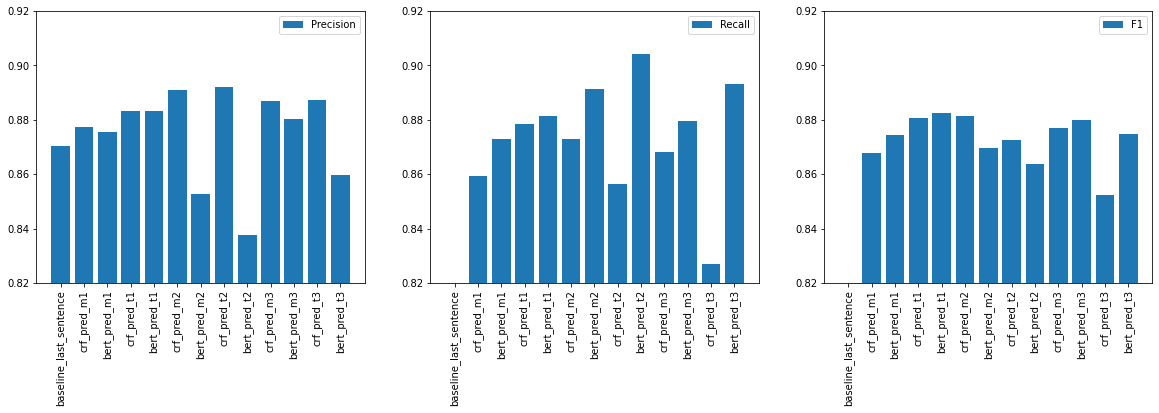

In [46]:
# Plot validation for full models
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.bar(val_results['model'], val_results['macro_precision'], label='Precision')
ax1.set_xticklabels(val_results['model'], rotation=90)
ax1.set_ylim(0.82, 0.92)
ax1.legend()
ax2.bar(val_results['model'], val_results['macro_recall'], label='Recall')
ax2.set_xticklabels(val_results['model'], rotation=90)
ax2.set_ylim(0.82, 0.92)
ax2.legend()
ax3.bar(val_results['model'], val_results['macro_f1'], label='F1')
ax3.set_xticklabels(val_results['model'], rotation=90)
ax3.set_ylim(0.82, 0.92)
ax3.legend()
plt.show()

In [54]:
val_pos_results.pivot(index='model', columns='sentence_position', values='macro_precision')

sentence_position,0,1
model,,
baseline_last_sentence,0.447880,0.422667
bert_pred_m1,0.792776,0.795917
bert_pred_m2,0.765927,0.816832
bert_pred_m3,0.804081,0.787931
bert_pred_t1,0.814733,0.767814
bert_pred_t2,0.752273,0.826634
bert_pred_t3,0.777766,0.804207
crf_pred_m1,0.792905,0.783230
crf_pred_m2,0.817725,0.791544


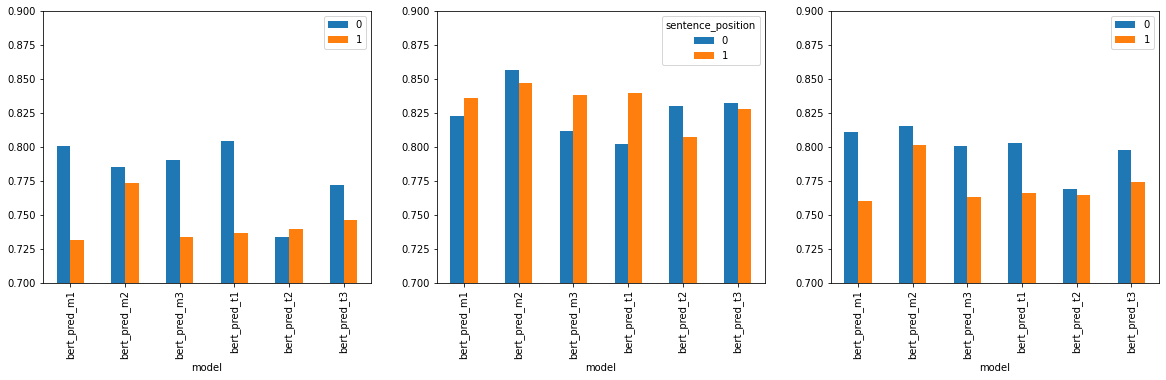

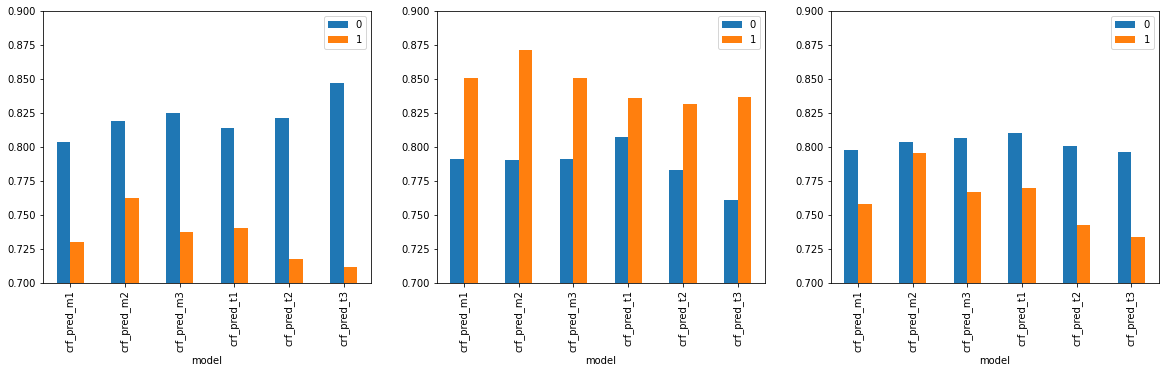

In [72]:
# Separate positional test results by bert and crf
test_positional_bert = test_pos_results[test_pos_results['model'].str.contains('bert')]
test_positional_crf = test_pos_results[test_pos_results['model'].str.contains('crf')]

# Plot test data for positional models (bert)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
test_positional_bert.pivot(index='model', columns='sentence_position', values='macro_precision').plot(kind='bar', ax=ax1)
ax1.set_ylim(0.7, 0.9)
ax1.legend()
test_positional_bert.pivot(index='model', columns='sentence_position', values='macro_recall').plot(kind='bar', ax=ax2)
ax2.set_ylim(0.7, 0.9)
test_positional_bert.pivot(index='model', columns='sentence_position', values='macro_f1').plot(kind='bar', ax=ax3)
ax3.set_ylim(0.7, 0.9)
ax3.legend()
plt.show()

# Plot test data for positional models (crf)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
test_positional_crf.pivot(index='model', columns='sentence_position', values='macro_precision').plot(kind='bar', ax=ax1)
ax1.set_ylim(0.7, 0.9)
ax1.legend()
test_positional_crf.pivot(index='model', columns='sentence_position', values='macro_recall').plot(kind='bar', ax=ax2)
ax2.set_ylim(0.7, 0.9)
ax2.legend()
test_positional_crf.pivot(index='model', columns='sentence_position', values='macro_f1').plot(kind='bar', ax=ax3)
ax3.set_ylim(0.7, 0.9)
ax3.legend()
plt.show()


/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


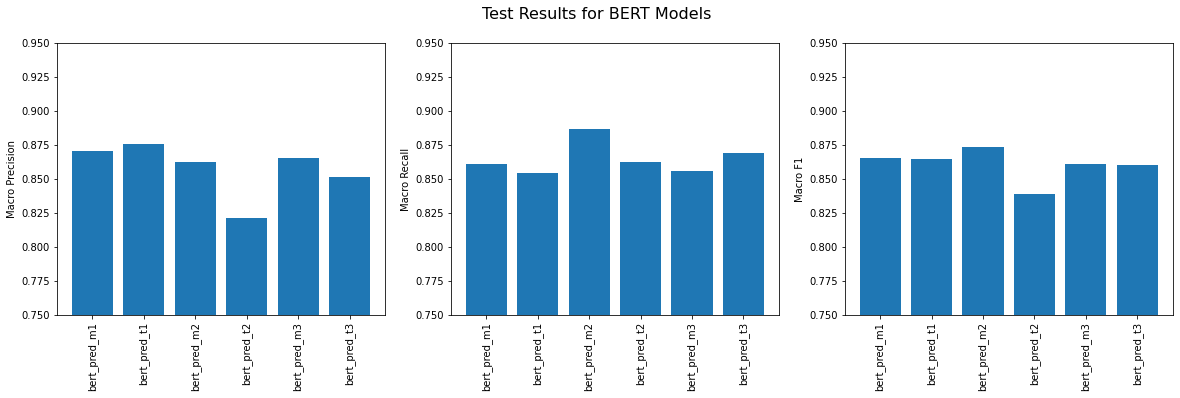

/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


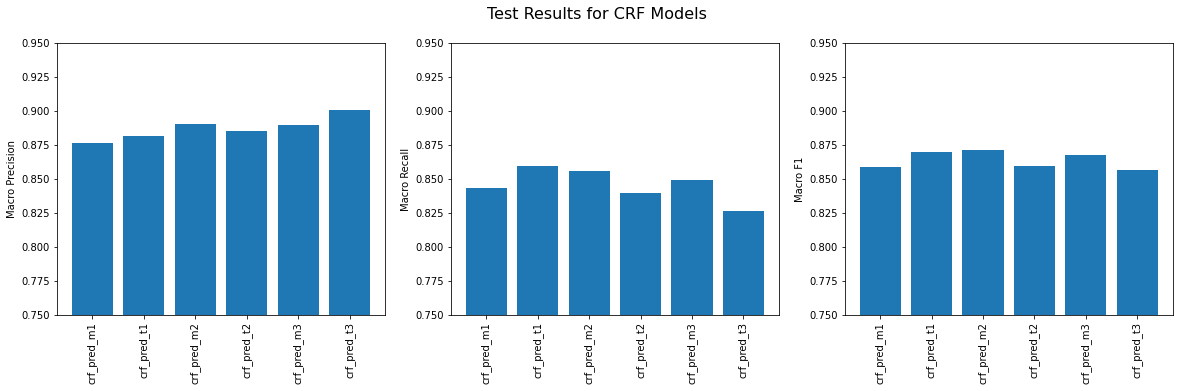

In [65]:
# Separate test results by bert and crf
test_results_bert = test_results[test_results['model'].str.contains('bert')]
test_results_crf = test_results[test_results['model'].str.contains('crf')]

# Plot test results for full bert models
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Test Results for BERT Models', fontsize=16)
ax1.bar(test_results_bert['model'], test_results_bert['macro_precision'], label='Precision')
ax1.set_xticklabels(test_results_bert['model'], rotation=90)
ax1.set_ylim(0.75, 0.95)
ax1.set_ylabel('Macro Precision')
# ax1.legend()
ax2.bar(test_results_bert['model'], test_results_bert['macro_recall'], label='Recall')
ax2.set_xticklabels(test_results_bert['model'], rotation=90)
ax2.set_ylim(0.75, 0.95)
ax2.set_ylabel('Macro Recall')
# ax2.legend()
ax3.bar(test_results_bert['model'], test_results_bert['macro_f1'], label='F1')
ax3.set_xticklabels(test_results_bert['model'], rotation=90)
ax3.set_ylim(0.75, 0.95)
ax3.set_ylabel('Macro F1')
# ax3.legend()
plt.show()

# Plot test results for full crf models
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Test Results for CRF Models', fontsize=16)
ax1.bar(test_results_crf['model'], test_results_crf['macro_precision'], label='Precision')
ax1.set_xticklabels(test_results_crf['model'], rotation=90)
ax1.set_ylim(0.75, 0.95)
ax1.set_ylabel('Macro Precision')
# ax1.legend()
ax2.bar(test_results_crf['model'], test_results_crf['macro_recall'], label='Recall')
ax2.set_xticklabels(test_results_crf['model'], rotation=90)
ax2.set_ylim(0.75, 0.95)
ax2.set_ylabel('Macro Recall')
# ax2.legend()
ax3.bar(test_results_crf['model'], test_results_crf['macro_f1'], label='F1')
ax3.set_xticklabels(test_results_crf['model'], rotation=90)
ax3.set_ylim(0.75, 0.95)
ax3.set_ylabel('Macro F1')
# ax3.legend()
plt.show()